Visualização de dados com Matplotlib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Gráficos de linhas

In [ ]:
np.random.seed(7)
# vetor com npumeros inteiros aleatorios entre 1,1500, com 10 amostras
y = np.random.randint(low=1, high = 1500, size = 10)

In [ ]:
y

In [ ]:
plt.plot(y)

In [ ]:
# insere a primeira linha no plot
plt.plot(y,color='#749187', marker = 'o', ms=5, mec= 'k',
         markerfacecolor = 'w', ls = '-.')
# marker: marcador / ms: tamanho do marcador / cor da linha do marcador
# markerfacecolor: mudar cor da face do marcador / ls: estilo da linha
#------------------------------------------------------------------------
# insere a segunda linha no plot
plt.plot(y*2, marker ='+', color = 'k', ms=5) 
#marker: o marcador / color: cor da linha / ms: tamanho do carcador
#------------------------------------------------------------------------
# rótulos
plt.xlabel('Eixo X', color = 'red', size = 12) # título do eixo X
# color: cor do título / # size: tamanho da fonte
plt.ylabel('Eixo Y') # título do eixo Y
plt.title('Título', loc='left') # Título e sua localização
#------------------------------------------------------------------------
#grindlines
plt.grid(axis = 'y', color = 'gray', 
         linestyle = '--', linewidth=1,
         alpha=0.8)
# axis: grade de linhas - eixos ('both','x','y') / color: cor da linha
# linestyle: estilo da linha / linewidth: espessura da linha / alpha: opacidade

plt.show()
         

Subplots

In [ ]:
# criar números para os gráficos
np.random.seed(6)
x = np.arange(1,11)
y1 = np.random.randint(1,400,10)
y2 = np.random.randint(150,500,10)
y3 = np.random.randint(200,600,10)

#------------------------------------

plt.figure(figsize =(15,5)) # tamanho da figura
plt.suptitle('Figura', fontsize = 15) # título da figura

#-------------------------------------

plt.subplot(1,3,1) # subplot com 1 linha e 3 colunas
plt.plot(x, y1, color = 'k')
plt.title('Subplot 1', pad = 10)
plt.xlabel ('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1,3,2)
plt.plot(x, y2, color ='r')
plt.title('Subplot 2', pad =10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.subplot(1,3,3)
plt.plot(x, y3, color ='g')
plt.title('Subplot 3', pad =10)
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')

plt.tight_layout(pad=4) # aumentar o espaçamento entre cada subplot
plt.show() 


In [ ]:
# criar a mesma figura anterior de forma mais simplificada

fig, ax = plt.subplots(1,3, figsize = (15,5)) # config da figura
fig.suptitle('Figure')    # alterar o título da figura
ax[0].plot(x, y1, color = 'black') 
ax[1].plot(x, y2, color = 'red')
ax[2].plot(x, y3, color = 'green')

for i in range(3):
    ax[i].set(title = f'Subplot {i+1}', xlabel = 'Eixo X', ylabel = 'Eixo Y')

 Histograma e boxplot

In [ ]:
data = np.random.normal(10,0.5,5000)
plt.hist(data)
plt.show()

In [ ]:
plt.boxplot(data);

Scallet plot

In [ ]:
# distribuições estatísticas (simulação)
x = np.random.normal(10, 0.5, 100)
y = np.random.uniform(0, 20, 100)

In [ ]:
fig = plt.figure() # criar figura
ax = plt.axes() # criar eixo
ax.scatter(x, y, marker = 'o', color = 'red', label = 'data 1', alpha = 0.5)
ax.scatter(x*0.5, y*0.5, marker = 'v', color = 'black', label = 'data 2', alpha =0.7)
ax.legend();

Dados Econômicos

In [ ]:
import plotly.express as px

In [ ]:
px.data.gapminder()

In [ ]:
# armazenar dados na variável df / filtra apenas / Brazil / alterar indice para year
df = px.data.gapminder().query('country == "Brazil"').set_index('year')

In [ ]:
df.head()

In [ ]:
# evolução da renda per capita
plt.plot(df.index, df['gdpPercap'])
plt.title('PIB per Capita do Brasil') # título 
plt.ylabel('PIB per capita') # Legenda do eixo Y
plt.xlabel('Tempo'); # legenda do eixo X

In [ ]:
# olhando dataframe
df.head()

*Relação Expectativa de Vida Vs. renda per Capita Brasil*

In [ ]:
title = 'Relação entre expectativa de vida e renda per capita no Brasil' # título

plt.figure(figsize =(12, 4)) # config da figura
plt.scatter(df['lifeExp'], df['gdpPercap'], cmap = 'viridis') 
# o que vai no eixo X: df['lifeExp']
# o que vai no eixo Y: df['gdpPercap']

plt.xlabel('Expectativa de Vida')
plt.ylabel('Renda per Capita')
plt.title(title, loc = 'left')
plt.show()

In [ ]:
# Gráfico de barra
plt.bar(x= df.index, # Eixo X
        height = df['pop'], # altura do grafico - eixo Y
        color = 'red'
       )
plt.title('População brasileira');

In [ ]:
# função para filtrar continente
def filtrar_continente(continente):
    df = px.data.gapminder()
    df = df[df['continent'] == continente]
    return df

In [ ]:
def filtrar_pais(pais, variavel):
    'Filtra algum país da amostra para as variáveis "pop", "gdpPercap" e "lifeExp"'
    df = px.data.gapminder()
    df = df[df['country'] == pais][variavel]
    return df
    

In [ ]:
paises

In [ ]:
americas = filtrar_continente('Americas') #filtrar continente - países do continente Americano
paises = americas['country'].unique() # ver países dentro da amostra
plt.figure(figsize = (12,8)) # tamanho da figura
for pais in paises: # para cada país dentro da lista de países
    plt.scatter(filtrar_pais(pais = pais,
                                   variavel = 'lifeExp'
                                  ),
# filtrar em expectativa de vida
#--------------------------------------------------------
                    filtrar_pais(pais = pais,
                                   variavel = 'gdpPercap'
                                  ))
# filtrar em renda per capita
#---------------------------------------------------------
plt.legend(labels = paises, loc = 'best') #legenda
plt.title('Relação entre renda per capita e expectativa de vida', loc =  'left')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita');

**Visualização de dados com Seaborn**

*Seaborn é uma biblioteca de visualização de dados do Python baseado no Matplotlib. Ele provê uma interface de alto nível para construção de gráficos estatísticos atrativos e informativos*

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
#--------------------------------
# Definir tema
sns.set_theme(style='darkgrid')

In [21]:
# ocultar avisos
import warnings
warnings.filterwarnings("ignore", message=".*observed=False is deprecated.*")


In [3]:
# DADOS - usar o do próprio seaborn
Base_dados = sns.load_dataset('tips')
#--------------------
# Ver base de dados
Base_dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# Renomear as colunas
Base_dados.rename(columns ={
    'total_bill': 'Total Conta',
    'tip': 'Gorjeta',
    'sex': 'Sexo',
    'smoker': 'Fumante',
    'day': 'Dia da Semana',
    'time': 'Período',
    'size': 'Pessoas na Mesa'
    }, inplace=True)

#-----------------------
#Ver dados após a renomeação das colunas
Base_dados.head()

,Total Conta,Gorjeta,Sexo,Fumante,Dia da Semana,Período,Pessoas na Mesa
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Grafico relplot

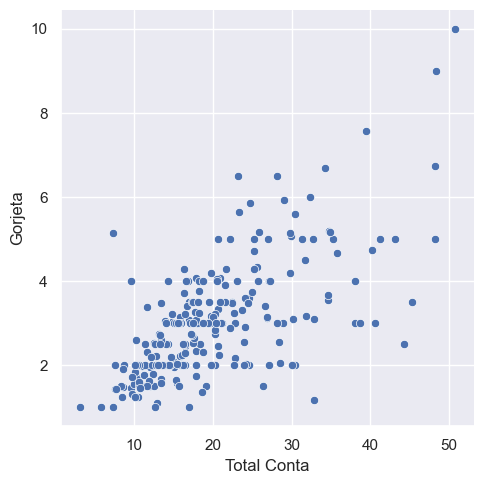

In [6]:
sns.relplot(x='Total Conta', y='Gorjeta', data=Base_dados);

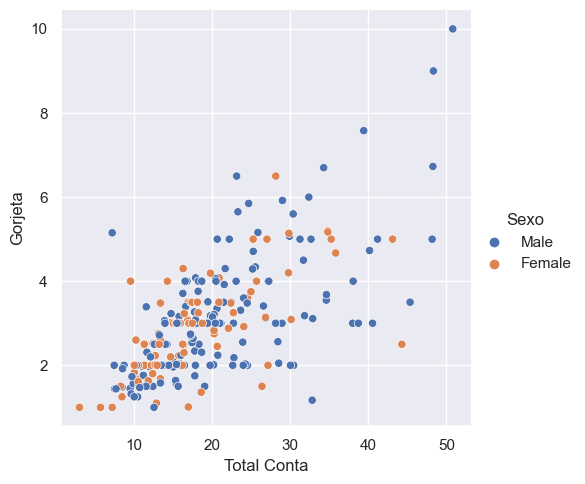

In [8]:
# Gráfico relplot
# Passando outro parâmetro como classe no gráfico
sns.relplot(x='Total Conta', y='Gorjeta', data=Base_dados, hue='Sexo');

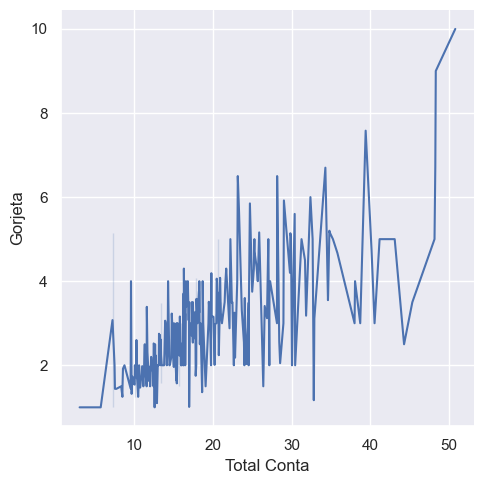

In [22]:
# Gráfico de linha com 2 Eixos
sns.relplot(x='Total Conta', y='Gorjeta', data=Base_dados, kind='line');

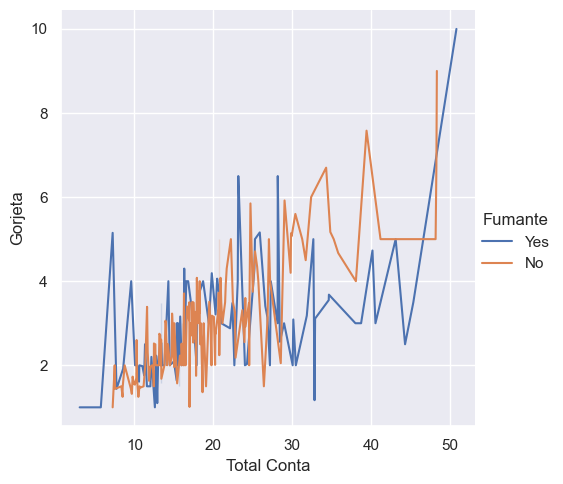

In [23]:
# Gráfico de linha com 2 Eixos
sns.relplot(x='Total Conta', y='Gorjeta', data=Base_dados, kind='line', hue='Fumante');

Gráfico histplot

<Axes: xlabel='Total Conta', ylabel='Count'>

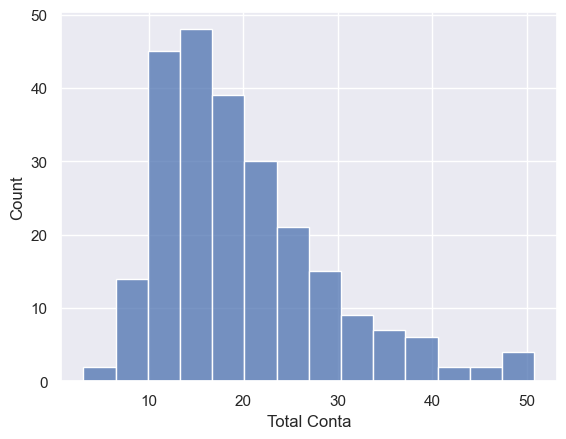

In [24]:
# Concentração das maiores gorjetas
sns.histplot(data=Base_dados, x='Total Conta')

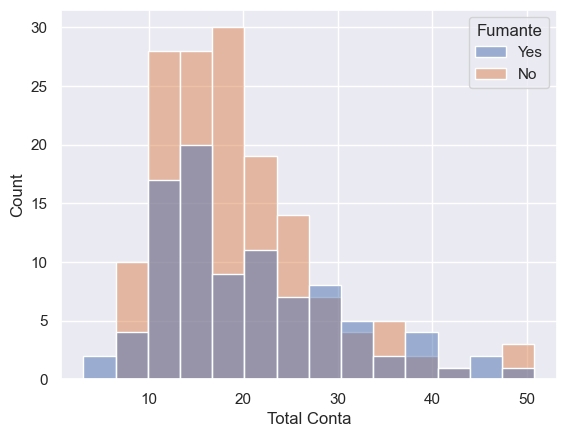

In [28]:
sns.histplot(data= Base_dados, x='Total Conta', hue='Fumante');

Gráfico barplot

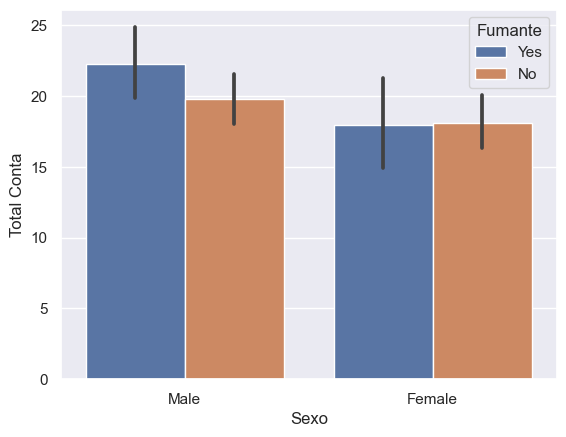

In [29]:
sns.barplot(data=Base_dados, x='Sexo', y='Total Conta', hue='Fumante');

Gráfico pairplot

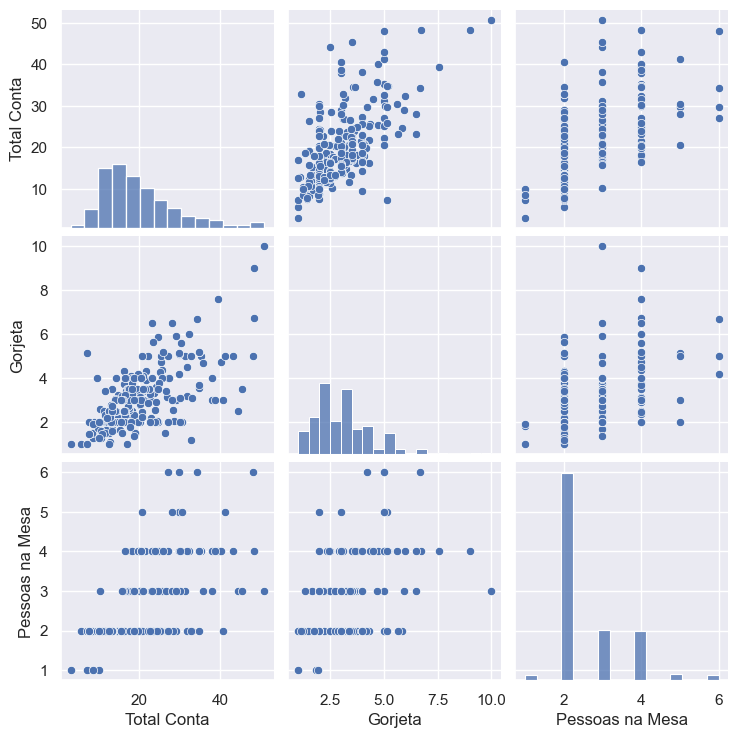

In [30]:
sns.pairplot(Base_dados);

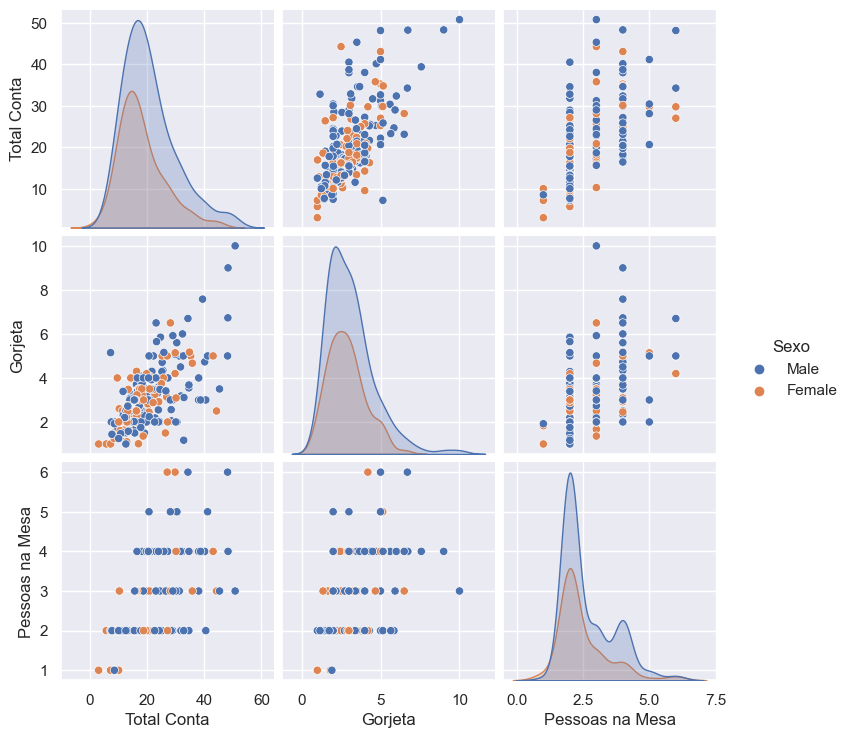

In [32]:
sns.pairplot(Base_dados, hue='Sexo');


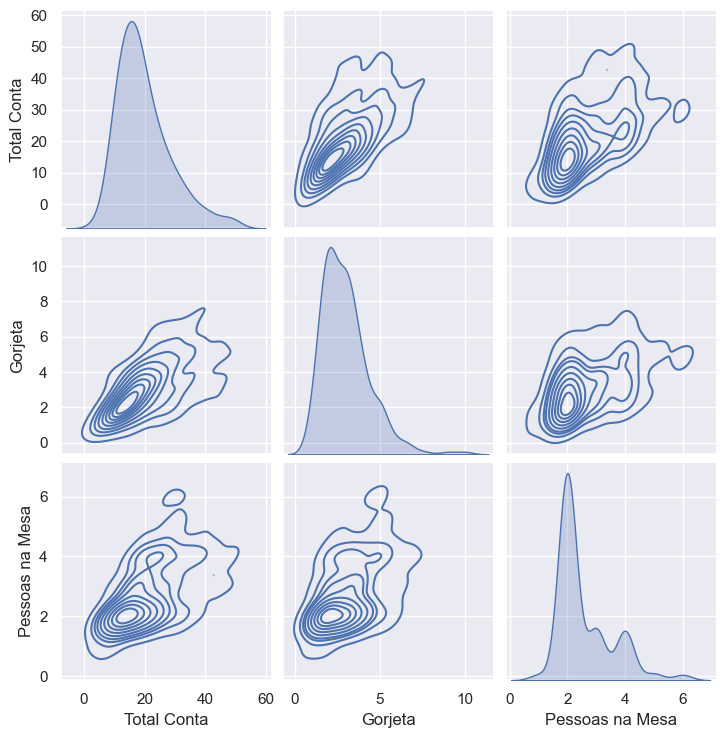

In [33]:
sns.pairplot(Base_dados, kind='kde');

Gráfico boxplot

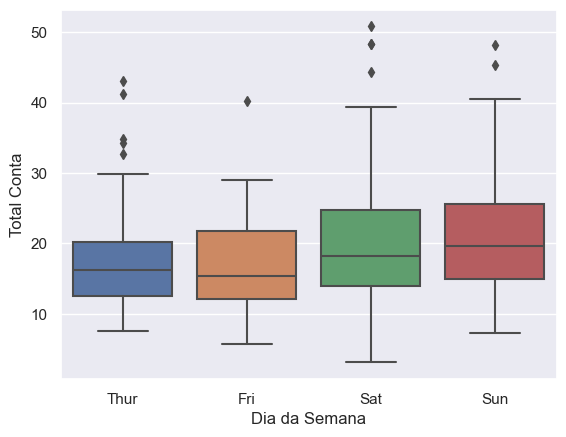

In [34]:
sns.boxplot(data=Base_dados, x='Dia da Semana', y='Total Conta');

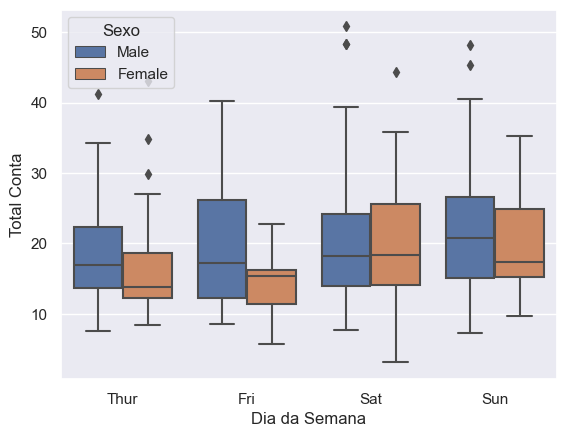

In [35]:
sns.boxplot(data=Base_dados, x='Dia da Semana', y='Total Conta', hue='Sexo');